In [1]:
import pandas as pd
import numpy as np
try:
    import cPickle as pickle
except ImportError:
    import _pickle as pickle
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
df_orig = pd.read_csv('./data_vasochange/rl_original.csv')

In [3]:
df_train = pd.read_csv('./data_vasochange/train_withterm.csv')

In [4]:
df_test = pd.read_csv('./data_vasochange/test_withterm.csv')

In [5]:
df_train_orig = df_orig[df_orig['icustayid'].isin(df_train['icustayid'].unique())]

In [6]:
df_test_orig = df_orig[df_orig['icustayid'].isin(df_test['icustayid'].unique())]

In [7]:
False in np.array(df_test['icustayid']) == np.array(df_test_orig['icustayid'])

False

In [8]:
phys_actions = pickle.load(open( '/home/userfs/y/yj914/SepsisDeepRL1/sarsa_phys/phys_actions_test.p','rb' ))

In [9]:
deeprl2_actions = pickle.load(open( '/home/userfs/y/yj914/SepsisDeepRL1/vasochange4_dqn_normal/dqn_normal_actions_test.p','rb' ))

In [10]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = [i,j]
        count += 1

In [11]:
phys_actions_tuple = [None for i in range(len(phys_actions))]
deeprl2_actions_tuple = [None for i in range(len(phys_actions))]                                    

for i in range(len(phys_actions)):
    phys_actions_tuple[i] = inv_action_map[phys_actions[i]]
    deeprl2_actions_tuple[i] = inv_action_map[deeprl2_actions[i]]

In [12]:
phys_actions_tuple = np.array(phys_actions_tuple)
deeprl2_actions_tuple = np.array(deeprl2_actions_tuple)

In [13]:
phys_actions_iv = phys_actions_tuple[:,0]
phys_actions_vaso = phys_actions_tuple[:,1]
hist, x_edges, y_edges = np.histogram2d(phys_actions_vaso, phys_actions_iv , bins=5)

In [14]:
deeprl2_actions_iv = deeprl2_actions_tuple[:,0]
deeprl2_actions_vaso = deeprl2_actions_tuple[:,1]
hist2, _, _ = np.histogram2d(deeprl2_actions_vaso,deeprl2_actions_iv, bins=5)

In [35]:
len(deeprl2_actions_vaso) + len(deeprl2_actions_iv)

57734

In [39]:
count = 0
for i in range(len(deeprl2_actions_vaso)):
    if deeprl2_actions_vaso[i] != 0:
        count += 1
print(count)
    

6943


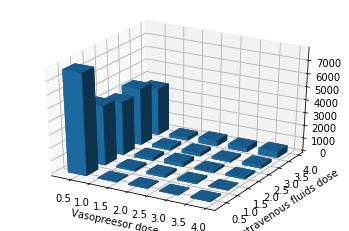

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
xpos, ypos = np.meshgrid(x_edges[:-1] + 0.25, y_edges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5
dz = hist.ravel()
ax.set_xlabel('Vasopreesor dose')
ax.set_ylabel('Intravenous fluids dose')
#ax.set_zlabel('Signal Intensity')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
plt.show()

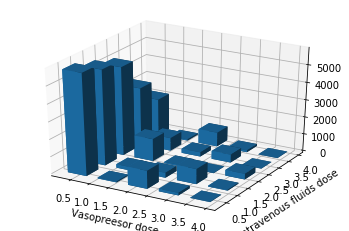

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
xpos, ypos = np.meshgrid(x_edges[:-1] + 0.25, y_edges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5
dz = hist2.ravel()
ax.set_xlabel('Vasopreesor dose')
ax.set_ylabel('Intravenous fluids dose')
#ax.set_zlabel('Signal Intensity')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
plt.show()

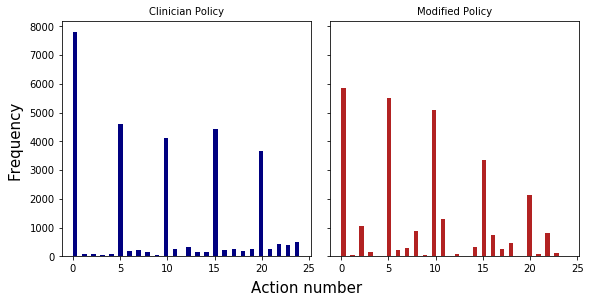

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,4))
ax1.hist(phys_actions, bins=50, color='navy')
ax1.set_title("Clinician Policy", fontsize = 10)
ax2.hist(deeprl2_actions, bins=50, color='firebrick')
ax2.set_title("Modified Policy", fontsize = 10)

f.text(0.5, -0.03, 'Action number', ha='center', fontsize=15)
f.text(-0.02, 0.5, 'Frequency', va='center', rotation='vertical', fontsize = 15)
plt.tight_layout()

In [18]:
interventions = df_orig[['max_dose_vaso', 'input_4hourly']]
interventions.head()

,max_dose_vaso,input_4hourly
0,0.0,50.0
1,0.0,50.0
2,0.0,50.0
3,0.0,50.0
4,0.0,50.0


In [19]:
adjusted_vaso = interventions['max_dose_vaso'][interventions['max_dose_vaso'] >0]
adjusted_iv = interventions['input_4hourly'][interventions['input_4hourly']>0]

In [20]:
vaso_vals = [0]
vaso_vals.extend(adjusted_vaso.quantile([0.125,0.375,0.625,0.875]))
iv_vals = [0]
iv_vals.extend(adjusted_iv.quantile([0.125,0.375,0.625,0.875]))

In [21]:
vaso_vals

[0, 0.04, 0.133, 0.251, 0.7859999999999999]

In [22]:
vaso_vals[2]= 0.135000000000000
vaso_vals[3]= 0.270000000000000
vaso_vals[4]= 0.785999999999999

In [23]:
iv_vals

[0, 30.0, 80.0, 290.0, 875.0]

In [24]:
iv_vals[2]= 80.0040000000000
iv_vals[3]= 290
iv_vals[4]= 873.513090448755

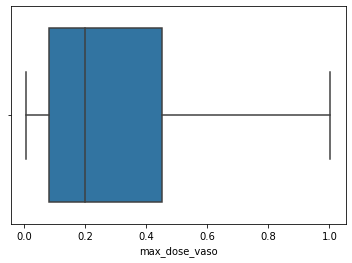

In [25]:
import seaborn as sns
sns.boxplot(x= df_test_orig['max_dose_vaso'][df_test_orig['max_dose_vaso']>0])

In [26]:
# def sliding_mean(data_array, window=1):
#     new_list = []
#     for i in range(len(data_array)):
#         if i ==0:
#             indices = range(0,1)
#         else:
#             indices = range(max(i - window +1, 0),
#                         min(i + window +1, len(data_array)))
#         avg = 0
#         for j in indices:
#             avg += data_array[j]
#         avg /= float(len(indices))
#         new_list.append(avg)     
#     return np.array(new_list)

In [27]:
 def sliding_mean(data_array, window=1):
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)     
    return np.array(new_list)

In [28]:
def make_df_diff(op_actions):
    op_vaso_med = []
    op_iv_med = []
    for action in op_actions:
        iv,vaso = inv_action_map[action]
        op_vaso_med.append(vaso_vals[vaso])
        op_iv_med.append(iv_vals[iv])
    iv_diff = np.array(op_iv_med) - np.array(df_test_orig['input_4hourly'])
    vaso_diff = np.array(op_vaso_med) - np.array(df_test_orig['max_dose_vaso'])
    df_diff = pd.DataFrame()
    df_diff['mort'] = np.array(df_test_orig['mortality_90d'])
    df_diff['iv_diff'] = iv_diff
    df_diff['vaso_diff'] = vaso_diff
    return df_diff

In [29]:
from scipy.stats import sem
def make_iv_plot_data(df_diff):
    bin_medians_iv = []
    mort_iv = []
    mort_std_iv= []
    i = -800
    while i <= 900:
        count =df_diff.loc[(df_diff['iv_diff']>i-50) & (df_diff['iv_diff']<i+50)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_iv.append(i)
                mort_iv.append(res)
                mort_std_iv.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 100
    return bin_medians_iv, mort_iv, mort_std_iv

In [30]:
from scipy.stats import sem
def make_vaso_plot_data(df_diff):
    bin_medians_vaso = []
    mort_vaso= []
    mort_std_vaso= []
    i = -0.8
    while i <= 0.8:
        count =df_diff.loc[(df_diff['vaso_diff']>i-0.1) & (df_diff['vaso_diff']<i+0.1)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_vaso.append(i)
                mort_vaso.append(res)
                mort_std_vaso.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 0.2
    return bin_medians_vaso, mort_vaso, mort_std_vaso

In [31]:
df_diff_deeprl2 = make_df_diff(deeprl2_actions)

In [32]:
bin_med_iv_deep, mort_iv_deep, mort_std_iv_deep = make_iv_plot_data(df_diff_deeprl2)
bin_med_vaso_deep, mort_vaso_deep, mort_std_vaso_deep = make_vaso_plot_data(df_diff_deeprl2)

Text(-0.02, 0.5, 'Observed Mortality Rate')

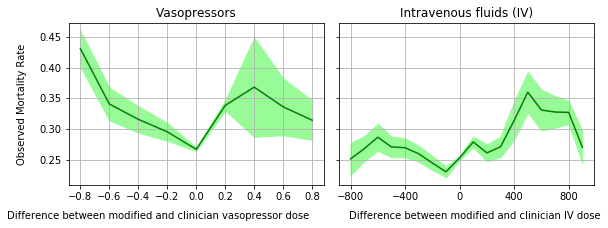

In [33]:
f, ((ax1, ax2)) = plt.subplots(1, 2, sharex='col', sharey='row', figsize = (8,3))
ax1.plot(bin_med_vaso_deep, sliding_mean(mort_vaso_deep), color='g')
ax1.fill_between(bin_med_vaso_deep, sliding_mean(mort_vaso_deep) - 1*mort_std_vaso_deep,  
                 sliding_mean(mort_vaso_deep) + 1*mort_std_vaso_deep, color='palegreen')
ax1.set_title('Vasopressors')
x_r = [i/10.0 for i in range(-8,10,2)]
y_r = [i/20.0 for i in range(0,20,1)]
ax1.set_xticks(x_r)
ax1.set_yticks(y_r)
ax1.grid()

ax2.plot(bin_med_iv_deep, sliding_mean(mort_iv_deep), color='g')
ax2.fill_between(bin_med_iv_deep, sliding_mean(mort_iv_deep) - 1*mort_std_iv_deep,  
                 sliding_mean(mort_iv_deep) + 1*mort_std_iv_deep, color='palegreen')
ax2.set_title('Intravenous fluids (IV)')
x_iv = [i for i in range(-800,900,400)]
ax2.set_xticks(x_iv)
ax2.grid()

plt.tight_layout()
f.text(0.225, -0.03, 'Difference between modified and clinician vasopressor dose', ha='center', fontsize=10)
f.text(0.775, -0.03, 'Difference between modified and clinician IV dose', ha='center', fontsize=10)
f.text(-0.02, 0.5, 'Observed Mortality Rate', va='center', rotation='vertical', fontsize = 10)